**классификатор текстов CharCNN**

Евгений Борисов <esborisov@sevsu.ru>

## Данные

In [1]:
import pandas as pd
import numpy as np
import numpy.random as rng
from tqdm.notebook import tqdm
tqdm.pandas()        
pd.options.display.max_colwidth = 200 

In [2]:
ff = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount','unk']

data = pd.concat([
    pd.read_csv('data/positive.csv.gz',sep=';',header=None),
    pd.read_csv('data/negative.csv.gz',sep=';',header=None),
])

data.columns = ff

data = data[['id','ttext', 'ttype']]

print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

data.sample(10)

negative: 111923 
positive: 114911


,id,ttext,ttype
29142,412648004894457856,@NatalyPoloz @rouuusi Надо хоть начать делать третий модуль...(((,-1
105185,424091998002221056,@HE_HOOORM ясн у тебя кто-то другой есть (((,-1
107694,411158740146995202,@den__1980 @okpochepa Идеальный характер?)Характер он есть или его нет.,1
72554,410484992704147456,"@galyonkin @blessmepadre @karin_karin_b Да нормально всё, если что в EA вас примут)",1
88644,421507059171856384,@Ahlurglgr Вообще не хорошо Оо\nУ меня вот в ухе вчера стреляло((,-1
91317,421973328606535680,"Смотрела фотки @KryvenchukL с Германии и сразу вспоминаю нашу поездку, все те эмоции, Берлин,Дрезден,Львов. Эх:( http://t.co/cQHw46ahHq",-1
5308,409062871667326976,Когда-то этот парень снес крышу мне и @PolinaX_X\n)) http://t.co/EhHXTeW5Vk,1
38978,413805806296264705,"любить не сложно,сложно забыть..сложно забыть того,кто о тебе уже и не помнит=( http://t.co/jcIXXqTfaW",-1
52885,410060826759151616,"На всю квартиру отборный мат, детишки играют в приставку :D",1
12382,409311697732505601,@KateDvoinyh убийством Ярого и предательством Бритвы:?),1


### очистка данных

In [3]:
import re

In [4]:
# применяет список замен pat к строке s
def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

# нормализация текста
def string_normalizer(s):
    pat = [
      [r'[ёЁ]','е'] # замена ё для унификации
      #,[r'</?[a-z]+>',' '] # удаляем xml
      ,[r'[:;]-*[)D]',' радость ']
      ,[r'\)\)\)*',' радость ']
      ,[r'[:;]\*',' поцелуй ']
      ,[r':\(',' печаль ']
      ,[r'\(\(\(*',' печаль ']
      #,[r'\d+',' digit ']
    ]
    return replace_patterns(s,pat).strip()

In [5]:
data['ttext_'] = data['ttext'].progress_apply(string_normalizer)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [6]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [7]:
def tokenize(line): # разбиваем предложения на слова
    return    [ 
        t.lower() 
        for t in nltk_tokenize_word(line) 
        if re.match(r'[a-zа-я]+',t.lower()) # выкинуть слова не содержащие букв
        # if re.match(r'[а-я -]+',t.lower()) and len(t)>1 
        # if not( (t.lower() in stopwords) or (len(t)<3) ) 
    ] 

In [8]:
data['ttext_'] = data['ttext_'].progress_apply(tokenize)

  0%|          | 0/226834 [00:00<?, ?it/s]

In [9]:
data.sample(10)

,id,ttext,ttype,ttext_
27687,409605337487257600,На 2011 году в базе imdb числится 5760 названий. :),1,"[на, году, в, базе, imdb, числится, названий, радость]"
29068,409622147741806592,"@new_angeles1 да вообще:D сериал интересный был видите ли:DD не ругала,что странно:D",1,"[new_angeles1, да, вообще, радость, сериал, интересный, был, видите, ли, радость, d, не, ругала, что, странно, радость]"
96999,422777346643333120,прям в буквальном смысле растоптал и да ещё и с девушкой поссорился из-за этого ((((,-1,"[прям, в, буквальном, смысле, растоптал, и, да, еще, и, с, девушкой, поссорился, из-за, этого, печаль]"
52706,410056303659081729,"@So_So_mini лента говорит, что ходил \nНикто ничего внятно не объяснил :)",1,"[so_so_mini, лента, говорит, что, ходил, никто, ничего, внятно, не, объяснил, радость]"
33071,413222771314139136,RT @back_to_90th: Уже не вернешь то время...( http://t.co/gVoaTtYiZZ,-1,"[rt, back_to_90th, уже, не, вернешь, то, время, http]"
371,408910785386385408,RT @nastya_kozai_: выздоравливай:* http://t.co/fnsuO52bNI,1,"[rt, nastya_kozai_, выздоравливай, поцелуй, http]"
20638,409416834841333760,@tzykina Привет??? Тань??? ... Да он вотще дружбанэ по ходу!))),1,"[tzykina, привет, тань, да, он, вотще, дружбанэ, по, ходу, радость]"
74114,418621926274117634,"кажется что всё еще впереди, но так всё хреново, что часто в голову лезут мысли покончить собой ((",-1,"[кажется, что, все, еще, впереди, но, так, все, хреново, что, часто, в, голову, лезут, мысли, покончить, собой, печаль]"
30231,412845522287075328,Вчера повесилась девушка из Молдовы. Ей было всего 16 и она была беременна а её бросил парень... Она жила с бабушкой. Это сердечко ей... (,-1,"[вчера, повесилась, девушка, из, молдовы, ей, было, всего, и, она, была, беременна, а, ее, бросил, парень, она, жила, с, бабушкой, это, сердечко, ей]"
114776,411366991040360448,RT @b_kontur: Какие важные изменения ждут бухгалтера в 2014 году? Читайте в нашей статье :) http://t.co/GPnySX3x2U,1,"[rt, b_kontur, какие, важные, изменения, ждут, бухгалтера, в, году, читайте, в, нашей, статье, радость, http]"


In [10]:
# максимальная длинна последовательности
seq_max_len = data['ttext_'].str.len().max() 
seq_max_len

36

In [11]:
# максимальная длинна слова
word_max_len = data['ttext_'].progress_apply(lambda s: max([ len(w) for w in s])).max()
word_max_len

  0%|          | 0/226834 [00:00<?, ?it/s]

136

In [12]:
# data[ data['ttext_'].str.len()<1 ] # пустые последовательности

In [13]:
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


In [14]:
data = data[ data['ttext_'].str.len()>0 ].reset_index(drop=True)
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111923 
positive: 114911


------

In [15]:
abc = set.union(*[ set(' '.join(s)) for s in data['ttext_'].apply(set) ])
abc = { w:n+1 for n,w in enumerate(sorted(abc)) }
# abc_len = len(abc)
# abc_len
len(abc)

197

In [16]:
# дополняем до максимальной длины
def pad_seq(s,max_len,pad_code=0):
    return [pad_code]*(max_len-len(s))+s

# заменяем символы слова на последовательность номеров символов в алфавите 
def encode_abc(w,abc=abc ): 
    return list(map(abc.get,w))

def encode_abc_bin(codes,abc_len=len(abc)):
    return [ np.eye(abc_len,dtype=np.uint8)[c] for c in codes ]

def encode_seq(s, abc=abc, seq_max_len=seq_max_len, word_max_len=word_max_len, ):
    abc_len = len(abc)+1
    zero_word = np.zeros(abc_len,dtype=np.uint8) 
    zero_seq = np.zeros([1,word_max_len,abc_len],dtype=np.uint8) 
    return np.vstack(
        pad_seq( # дополняем последовательности до единого размера
            [ 
                np.vstack(
                    pad_seq( # дополняем код слова до единого размера
                        encode_abc_bin( encode_abc(w,abc=abc), abc_len=abc_len, ) # кодируем слово
                        ,word_max_len # максимальный размер слова
                        ,pad_code=zero_word # дополняем нулями
                    )
                )[np.newaxis,:]
                for w in s # для каждого слова последовательности
            ]
            ,seq_max_len # максимальный размер последовательности
            ,pad_code=zero_seq # дополняем нулями
        )
    )[np.newaxis,:]

# [ номер примера, позиция слова в предложении, позиция символа в слове, номер символа ]

In [17]:
def get_batch(df,batch_size=10_000,shuffle=True,):
    ii = rng.permutation(len(df)) if shuffle else np.array(range(len(df)))
    for i in range(0,len(ii),batch_size):
        yield (
            np.vstack( df.iloc[ii[i:i+batch_size]]['ttext_'].apply(encode_seq).values ), 
            # строим выход нейросети (из 2 нейронов)
            np.eye(2,dtype=np.float32)[(df.iloc[ii[i:i+batch_size]]['ttype'].values+1)//2],
        )

# x,target = next( get_batch(data,batch_size=1_000) )
# x.shape, target.shape

----

In [18]:
ii = rng.permutation(len(data))
n = len(data)//10
data_train  = data.iloc[ii[:n]].reset_index(drop=True)
data_test  = data.iloc[ii[n:]].reset_index(drop=True)

In [19]:
print('train:\n')
print('\tnegative:', len(data_train.query('ttype==-1')), '\n\tpositive:',len(data_train.query('ttype==1')) )

print('test:\n')
print('\tnegative:', len(data_test.query('ttype==-1')), '\n\tpositive:',len(data_test.query('ttype==1')) )

train:

	negative: 11212 
	positive: 11471
test:

	negative: 100711 
	positive: 103440


## модель

In [20]:
# del model
# del y

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
torch.__version__

'1.10.2+cu102'

In [23]:
n_classes = 2

class Model(nn.Module):
    def __init__(self, 
                 output_dim=n_classes, # размер выхода
                ):
        super().__init__()
        
        self._conv1= nn.Conv2d(
                in_channels=seq_max_len,
                out_channels=32,
                kernel_size=(15,15)
            )
        self._linear = nn.Linear(3072, output_dim) # выходной (линейный) слой

    def forward(self,x):
        o = self._conv1(x)
        o = F.relu(o)
        # o = torch.tanh(o)
        o = F.max_pool2d(o,kernel_size=15)
        o = torch.flatten(o, start_dim=1)
        o = self._linear(o) # считаем выход сети
        o = F.softmax(o,dim=1)
        
        return o 

In [24]:
model = Model()
model

Model(
  (_conv1): Conv2d(36, 32, kernel_size=(15, 15), stride=(1, 1))
  (_linear): Linear(in_features=3072, out_features=2, bias=True)
)

In [25]:
# x,y = next( get_batch(data,batch_size=100) )
# model( torch.tensor( x, dtype=torch.float32 ) ).shape
# del x
# del y

### обучаем модель

In [26]:
# проверяем GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [27]:
model = model.to(device)

In [28]:
criterion =  nn.CrossEntropyLoss() # ф-ция потери
optimizer = torch.optim.Adam(model.parameters(), lr=.005) # метод оптимизации

In [29]:
%%time

batch_size=128
loss_history = [] # значения ф-ции потери
n_epoch = 10 # количество эпох обучения

for i in range(n_epoch): 
    print('epoch:',i+1)
    for x,y in tqdm(
            get_batch(data_train,batch_size=batch_size)
            ,total=len(data_train)//batch_size
        ): # получаем батч учебных примеров
        x_ = torch.tensor(x,dtype=torch.float32).to(device)
        y_ = torch.tensor(y,dtype=torch.float32).to(device)
        out = model.forward(x_) # считаем выход модели
        loss = criterion(y_,out ) # вычисляем значение ф-ции потери
        loss_history.append(loss.item()) # дополняем историю изменения значений ф-ции потери
        optimizer.zero_grad() # очищаем предыдущее значение градиента
        loss.backward()  # вычисляем текущее значение градиента ф-ции потери
        optimizer.step() # корректируем параметры модели
        del x_
        del y_
    torch.cuda.empty_cache()
    #acc_history.append( accuracy(data_train) ) #значение погрешности

epoch: 1


  0%|          | 0/177 [00:00<?, ?it/s]

/opt/python3.8/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 2


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 3


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 4


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 5


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 6


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 7


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 8


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 9


  0%|          | 0/177 [00:00<?, ?it/s]

epoch: 10


  0%|          | 0/177 [00:00<?, ?it/s]

CPU times: user 24min 25s, sys: 3min 52s, total: 28min 17s
Wall time: 22min 48s


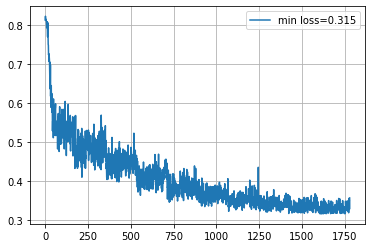

In [30]:
from matplotlib import pyplot as plt
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

## проверяем результат

In [31]:
# batch_size = 128

with torch.set_grad_enabled(False):
    o_test = np.hstack([
            np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
            for x,_ in tqdm(
                    get_batch( data_test, batch_size=batch_size, shuffle=False)
                    ,total=len(data_test)//batch_size
                )
        ])
    
target_test = (data_test['ttype']+1)//2  

from sklearn.metrics import classification_report
print(classification_report( target_test,o_test))

  0%|          | 0/1594 [00:00<?, ?it/s]

/opt/python3.8/lib/python3.8/site-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


              precision    recall  f1-score   support

           0       0.81      0.84      0.83    100711
           1       0.84      0.81      0.82    103440

    accuracy                           0.82    204151
   macro avg       0.82      0.82      0.82    204151
weighted avg       0.83      0.82      0.82    204151



----

In [32]:
# from sklearn.metrics import accuracy_score

# def accuracy(dataset,batch_size=128):
#     with torch.set_grad_enabled(False):
#         return np.mean([
#             accuracy_score(
#                 y[:,1],
#                 np.argmax( model(torch.tensor(x,dtype=torch.float32).to(device)).cpu().numpy(),axis=1 )
#             )
#             for x,y in tqdm(
#                     get_batch( dataset, batch_size=batch_size, shuffle=False)
#                     ,total=len(dataset)//batch_size
#                 )
#         ])
        
# # acc_history = [ accuracy(data_train) ] # начальное значение погрешности

In [33]:
# acc_history

In [34]:
# acc_history

In [35]:
# # история изменения значений погрешности модели
# plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)),c='r')
# plt.grid()
# plt.legend()

In [36]:
# x,y = next( get_batch(data,batch_size=100) )
# x.shape, y.shape

In [37]:
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=128,
#         kernel_size=(7,7)
#     )(torch.tensor(x,dtype=torch.float32))

# o = F.max_pool2d(o,kernel_size=5)

# o = nn.Conv2d(
#         in_channels=128,
#         out_channels=32,
#         kernel_size=(9,9)
#     )(o)

# o = F.max_pool2d(o,kernel_size=3)

# print(o.shape)

# o = torch.flatten(o, start_dim=1)

# o.shape

In [38]:
# max_pool2d(input, kernel_size, stride=None, padding=0, dilation=1,

In [39]:
# x,y = next( get_batch(data,batch_size=100) )
# # x.shape, y.shape
#
# o = nn.Conv2d(
#         in_channels=seq_max_len,
#         out_channels=32,
#         kernel_size=(15,15)
#     )(torch.tensor(x,dtype=torch.float32))
#
# o = F.max_pool2d(o,kernel_size=15)
#
# # o = nn.Conv2d(
# #         in_channels=128,
# #         out_channels=32,
# #         kernel_size=(9,9)
# #     )(o)
#
# # o = F.max_pool2d(o,kernel_size=3)
#
# print(o.shape)
#
# o = torch.flatten(o, start_dim=1)
#
# o.shape